In [ ]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [3]:
grads = pd.read_csv("completions(Y).csv")

print(grads.head())

   Year  PublicU PrivateU   TotalU  PublicM PrivateM   TotalM
0  1970  557,996  281,734  839,730  151,603   83,961  235,564
1  1971  599,615  287,658  887,273  167,075   90,126  257,201
2  1972  630,899  291,463  922,362  174,405   94,249  268,654
3  1973  651,544  294,232  945,776  184,632   97,442  282,074
4  1974  634,785  288,148  922,933  193,804  103,741  297,545


In [4]:
pop = pdr.DataReader("POP", "fred", start = 1970, end = 2020)

# Turn Population index date into an actual column
pop = pop.reset_index()

pop["Year"] = pop["DATE"].dt.year

pop = pop.groupby("Year").mean().reset_index()

pop = pop.drop(columns = ["DATE"])

print(pop.head())


   Year            POP
0  1970  204982.333333
1  1971  207589.333333
2  1972  209837.583333
3  1973  211857.166667
4  1974  213814.750000


In [11]:
merged = pd.merge(grads, pop, on = "Year", how = "inner")

num_cols = ["PublicU", "PrivateU", "TotalU", "PublicM", "PrivateM", "TotalM"]

for col in num_cols:
    merged[col] = (
        merged[col]
        .astype(str)
        .str.replace(r"[^0-9.\-]", "", regex=True)
        .replace({"": None, "-": None}) 
        .astype(float)
    )

merged["POP"] = merged["POP"] * 1000


merged["POP_millions"] = merged["POP"] / 1_000_000
merged["UGrads_millions"] = merged["TotalU"] / 1_000_000
merged["MGrads_millions"] = merged["TotalM"] / 1000000


print(merged.dtypes)
print(merged.tail())


Year                 int64
PublicU            float64
PrivateU           float64
TotalU             float64
PublicM            float64
PrivateM           float64
TotalM             float64
POP                float64
POP_millions       float64
UGrads_millions    float64
MGrads_millions    float64
dtype: object
    Year    PublicU  PrivateU     TotalU   PublicM  PrivateM    TotalM  \
46  2016  1275610.0  680504.0  1956114.0  374160.0  430382.0  804542.0   
47  2017  1310980.0  669685.0  1980665.0  383964.0  436278.0  820242.0   
48  2018  1340302.0  672784.0  2013086.0  386202.0  447590.0  833792.0   
49  2019  1362941.0  675741.0  2038682.0  392810.0  450721.0  843531.0   
50  2020  1385237.0  681208.0  2066445.0  405209.0  461685.0  866894.0   

             POP  POP_millions  UGrads_millions  MGrads_millions  
46  3.230955e+08    323.095500         1.956114         0.804542  
47  3.251427e+08    325.142676         1.980665         0.820242  
48  3.268821e+08    326.882088         2.01

<function matplotlib.pyplot.show(close=None, block=None)>

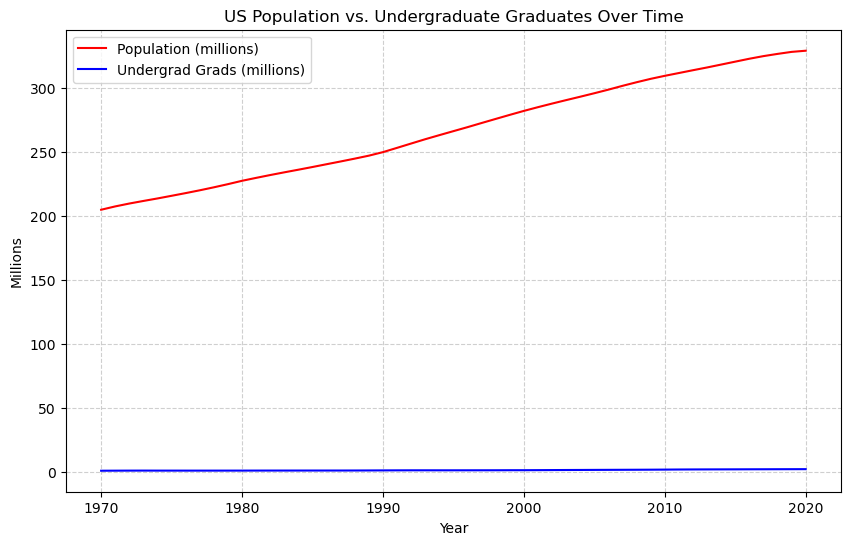

In [6]:
plt.figure(figsize = (10,6))

plt.plot(merged["Year"], merged["POP_millions"], label = "Population (millions)", color = "red")
plt.plot(merged["Year"], merged["UGrads_millions"], label = "Undergrad Grads (millions)", color = "blue")

plt.title("US Population vs. Undergraduate Graduates Over Time")
plt.xlabel("Year")
plt.ylabel("Millions")
plt.legend()
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.show

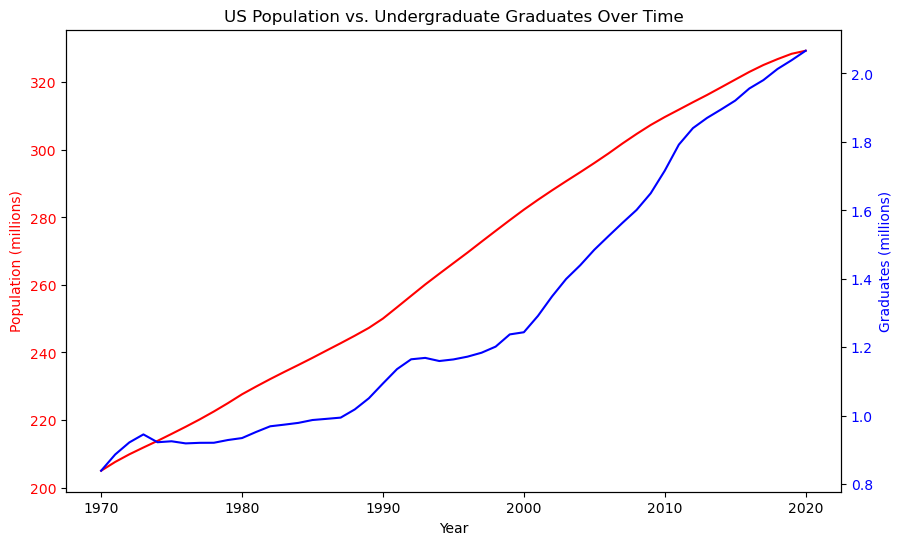

In [7]:

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis = Population
ax1.plot(merged["Year"], merged["POP_millions"], color="red", label="Population (millions)")
ax1.set_ylabel("Population (millions)", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# Right axis = Graduates
ax2 = ax1.twinx()
ax2.plot(merged["Year"], merged["UGrads_millions"], color="blue", label="Graduates (millions)")
ax2.set_ylabel("Graduates (millions)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

# Titles and labels
plt.title("US Population vs. Undergraduate Graduates Over Time")
ax1.set_xlabel("Year")

plt.show()


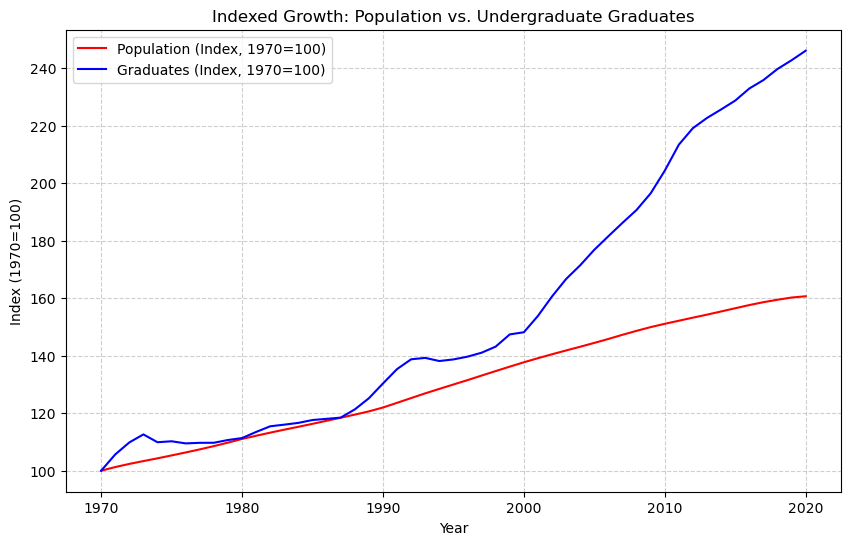

In [8]:
merged["POP_index"] = (merged["POP"] / merged["POP"].iloc[0]) * 100
merged["Grads_index"] = (merged["TotalU"] / merged["TotalU"].iloc[0]) * 100

plt.figure(figsize=(10,6))
plt.plot(merged["Year"], merged["POP_index"], color="red", label="Population (Index, 1970=100)")
plt.plot(merged["Year"], merged["Grads_index"], color="blue", label="Graduates (Index, 1970=100)")

plt.title("Indexed Growth: Population vs. Undergraduate Graduates")
plt.xlabel("Year")
plt.ylabel("Index (1970=100)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


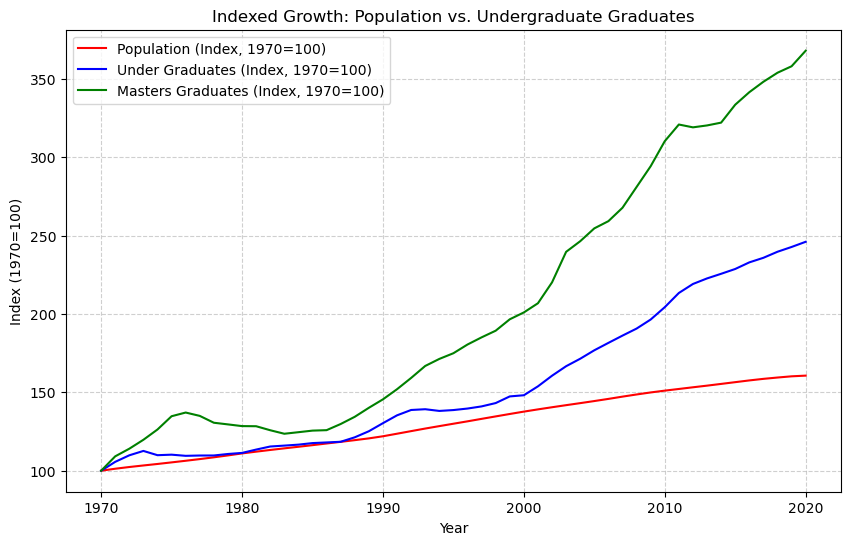

In [12]:
merged["POP_index"] = (merged["POP"] / merged["POP"].iloc[0]) * 100
merged["UGrads_index"] = (merged["TotalU"] / merged["TotalU"].iloc[0]) * 100
merged["MGrads_index"] = (merged["TotalM"] / merged["TotalM"].iloc[0]) * 100


plt.figure(figsize=(10,6))
plt.plot(merged["Year"], merged["POP_index"], color="red", label="Population (Index, 1970=100)")
plt.plot(merged["Year"], merged["UGrads_index"], color="blue", label="Under Graduates (Index, 1970=100)")
plt.plot(merged["Year"], merged["MGrads_index"], color="green", label="Masters Graduates (Index, 1970=100)")


plt.title("Indexed Growth: Population vs. Undergraduate Graduates")
plt.xlabel("Year")
plt.ylabel("Index (1970=100)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
